In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('abalone.csv')

In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

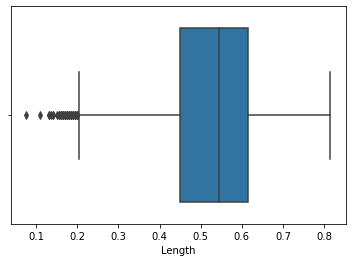

In [13]:
sns.boxplot(df.Length)

<AxesSubplot:xlabel='Sex', ylabel='count'>

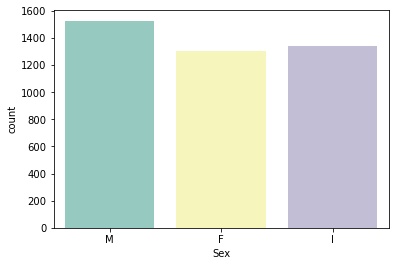

In [14]:
sns.countplot(x = 'Sex', data = df, palette = 'Set3')

<AxesSubplot:>

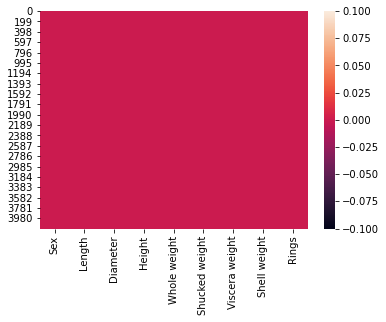

In [15]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Height', ylabel='Diameter'>

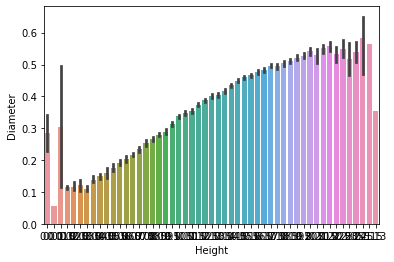

In [16]:
sns.barplot(x=df.Height,y=df.Diameter)

In [17]:
nf = df.select_dtypes(include = [np.number]).columns
cf = df.select_dtypes(include = [np.object]).columns

<ipython-input-17-3cae7d40af8b>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cf = df.select_dtypes(include = [np.object]).columns


<AxesSubplot:>

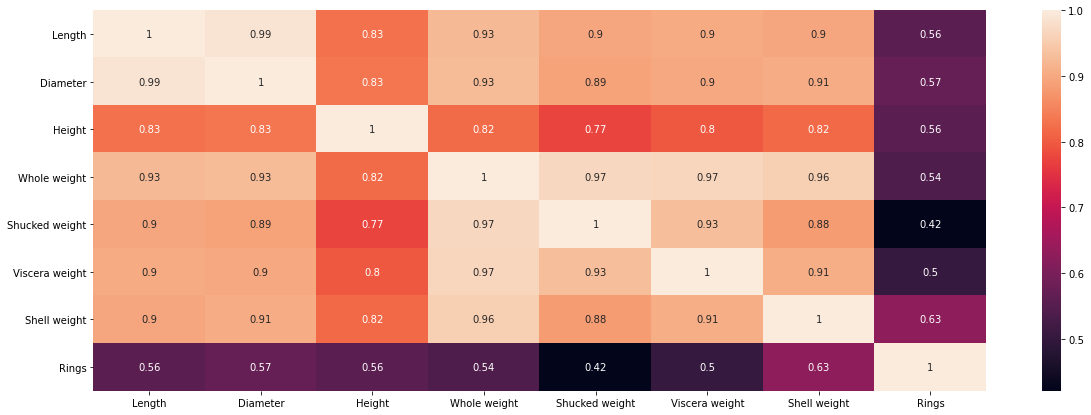

In [18]:
plt.figure(figsize = (20,7))
sns.heatmap(df[nf].corr(),annot = True)

In [ ]:
sns.pairplot(df)

In [ ]:
df['Height'].describe()

In [ ]:
df['Height'].mean()

In [ ]:
df.max()

In [ ]:
df['Sex'].value_counts()

In [ ]:
df[df.Height == 0]

In [ ]:
df['Shucked weight'].kurtosis()

In [ ]:
df['Diameter'].median()

In [ ]:
df['Shucked weight'].skew()

In [ ]:
df.isna().any()

In [ ]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

In [ ]:
q1=df.Rings.quantile(0.25)
q2=df.Rings.quantile(0.75)
iqr=q2-q1

In [ ]:
print(iqr)

In [ ]:
df = pd.get_dummies(df)
dummy_df = df
df.boxplot( rot = 90, figsize=(20,5))

In [ ]:
df['age'] = df['Rings']
df = df.drop('Rings', axis = 1)

In [ ]:
df.drop(df[(df['Viscera weight']> 0.5) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['age'] > 25)].index, inplace=True)

In [ ]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [ ]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [ ]:
numerical_features
categorical_features

In [ ]:
abalone_numeric = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'age', 'Sex_F', 'Sex_I', 'Sex_M']]

In [ ]:
abalone_numeric.head()

In [ ]:
x = df.iloc[:, 0:1].values

In [ ]:
y = df.iloc[:, 1]

In [ ]:
y

In [ ]:
print ("\n ORIGINAL VALUES: \n\n", x,y)

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
new_y= min_max_scaler.fit_transform(x,y) 
print ("\n VALUES AFTER MIN MAX SCALING: \n\n", new_y)

In [ ]:
X = df.drop('age', axis = 1)
y = df['age']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)
X_train

In [ ]:
y_train

In [ ]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
model=lm.LinearRegression()
results=model.fit(X_train,y_train) 

In [ ]:
accuracy = model.score(X_train, y_train)
print('Accuracy of the model:', accuracy)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_train_pred

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error :%2f'%s)

In [ ]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [ ]:
y_test_pred

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

In [ ]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

In [ ]:
from sklearn.metrics import r2_score
p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)